In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib.patches import Ellipse

import seaborn as sns; sns.set()
import numpy as np


from sklearn.datasets.samples_generator import make_blobs

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


# Generalizing E-M: Gaussian Mixture Models
from sklearn.mixture import GaussianMixture as GMM

### Creating Toy data

In [6]:
# Generate some data

X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)

X[:10]

array([[ 0.25006446,  6.48826703],
       [-2.69798647,  2.52194722],
       [-2.90007604,  3.06877291],
       [ 0.70295058,  4.31427482],
       [-2.53563494,  2.38449945],
       [-1.70297829,  7.80540956],
       [ 2.22322228,  0.83877343],
       [ 0.00793137,  4.17614316],
       [-1.79041773,  3.02668532],
       [ 1.76747403,  1.26987864]])

In [ ]:
X = X[:, ::-1] # flip axes for better plotting
X[:10]

### KMeans 

In [8]:
# Plot the data with K Means Labels

kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)

In [9]:
labels

array([1, 0, 0, 3, 0, 1, 2, 3, 0, 2, 1, 2, 3, 0, 0, 2, 0, 2, 3, 0, 0, 0,
       1, 3, 3, 1, 1, 3, 3, 2, 3, 3, 0, 3, 0, 1, 2, 3, 2, 3, 0, 1, 2, 3,
       2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 3, 2, 2, 0, 2, 2, 2, 2, 3, 0,
       2, 3, 0, 1, 0, 3, 0, 1, 2, 0, 3, 0, 1, 0, 0, 3, 2, 1, 3, 0, 0, 3,
       0, 2, 0, 2, 3, 0, 0, 1, 3, 2, 2, 2, 1, 2, 3, 3, 0, 1, 3, 1, 2, 0,
       0, 0, 3, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 1, 3, 1, 2, 2, 2, 3, 1, 1,
       1, 0, 3, 0, 1, 3, 1, 0, 3, 0, 0, 1, 0, 2, 3, 0, 2, 0, 2, 3, 2, 3,
       1, 0, 2, 0, 0, 0, 3, 0, 1, 0, 0, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2,
       3, 0, 3, 1, 3, 1, 0, 3, 1, 0, 1, 3, 3, 1, 3, 3, 1, 0, 1, 1, 1, 2,
       2, 3, 3, 0, 2, 2, 1, 3, 0, 1, 3, 1, 3, 3, 2, 2, 1, 2, 3, 1, 2, 1,
       0, 3, 1, 0, 0, 0, 2, 1, 3, 1, 3, 0, 3, 3, 1, 2, 0, 2, 3, 0, 2, 3,
       3, 1, 2, 3, 1, 3, 2, 0, 0, 2, 0, 3, 1, 1, 3, 3, 2, 1, 3, 0, 0, 0,
       1, 3, 3, 3, 3, 3, 2, 3, 3, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1,
       2, 3, 2, 3, 2, 0, 3, 2, 0, 3, 2, 2, 3, 0, 1,

### Plot data 

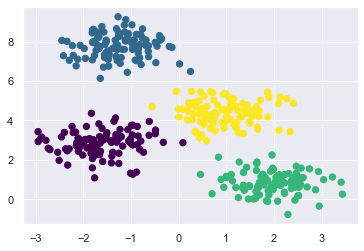

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [ ]:
"""


"""

In [11]:
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

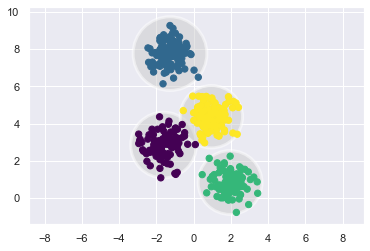

In [12]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

In [ ]:
"""
np.random.RandomState

"""

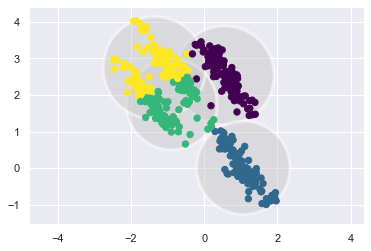

In [13]:
# 

rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

## Generalizing E-M: Gaussian Mixture Models

In [20]:
# GMM

gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)


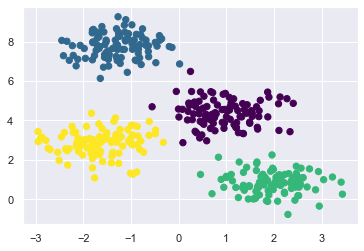

In [21]:
# plot GMM

plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [23]:
# probabilistic cluster assignments

probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.537 0.463 0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]]


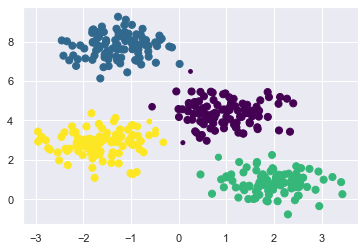

In [24]:
# visualize this uncertainty by, for example, making the size of each point proportional to the certainty of its prediction

size = 50 * probs.max(1) ** 2  # square emphasizes differences

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [ ]:
from matplotlib.patches import Ellipse

In [26]:
# visualize the locations and shapes of the GMM clusters by drawing ellipses based on the GMM output

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

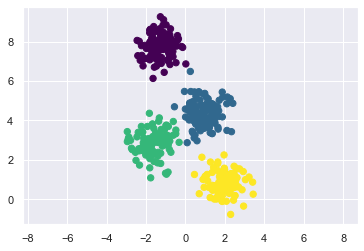

In [27]:
# Previous function does not run, needs to be updated by:
# https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html

gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm, X)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

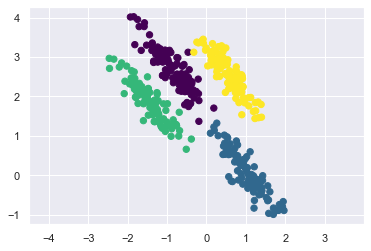

In [28]:
# Previous function does not run, needs to be updated by:
# https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html

gmm = GMM(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)